# Associated red out computed metrics with outcomes

We are interested to see if our logistic regression model annotating red-out can be used to measure the outcomes of the trial.

In [22]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import cohen_kappa_score

import numpy as np
import matplotlib.pyplot as plt

import pickle
import re
import datetime
from os.path import isfile, join
import csv
import datetime

In [23]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [24]:
%%R

library(tidyverse)
library(ggplot2)
library(ggrepel)
library(magrittr)

In [25]:
plot_saving_dir = '/Users/guillaumekugener/Documents/USC/USC_docs/ml/surgical-training-project/data/'
outcomes_data_parkcity = pd.read_csv('/Users/guillaumekugener/Documents/USC/USC_docs/ml/surgical-training-project/data/videos_latest_start_stop_timestamps.tsv', delimiter='\t')

In [38]:
outcomes_data_parkcity

,Folder,Folder.1,Folder.2,Video,Study ID,Trial,Start Time,End Time,TIME ON VIDEO
0,Park City 2019 Sim,01182019_170211,,ch1_video_01,609,I,00:03:47,00:09:03,5:16
1,Park City 2019 Sim,01182019_170211,,ch1_video_01,609,II,00:11:19,00:12:43,1:24
2,Park City 2019 Sim,01182019_170211,,ch1_video_02,610,I,00:00:20,00:01:50,1:30
3,Park City 2019 Sim,01182019_170211,,ch1_video_02,610,II,00:04:24,00:06:53,2:29
4,Park City 2019 Sim,01182019_170211,,ch1_video_02,611,I,00:13:20,00:16:00,2:40
5,Park City 2019 Sim,01182019_170211,,ch1_video_03,611,II,00:00:25,00:01:40,1:15
6,Park City 2019 Sim,01182019_170211,,ch1_video_03,612,I,00:06:45,00:08:00,1:15
7,Park City 2019 Sim,01182019_170211,,ch1_video_03,612,II,00:11:14,00:13:35,2:21
8,Park City 2019 Sim,01182019_170211,,ch1_video_03,613,I,00:19:33,00:24:03,4:30
9,Park City 2019 Sim,01182019_170211,,ch1_video_03,613,II,00:26:15,00:28:00,1:45


In [26]:
outcomes_data_parkcity = outcomes_data_parkcity.fillna('')

In [27]:
outcomes_data_parkcity[['Folder.1', 'Video', 'Study ID', 'Trial']]

,Folder.1,Video,Study ID,Trial
0,01182019_170211,ch1_video_01,609,I
1,01182019_170211,ch1_video_01,609,II
2,01182019_170211,ch1_video_02,610,I
3,01182019_170211,ch1_video_02,610,II
4,01182019_170211,ch1_video_02,611,I
5,01182019_170211,ch1_video_03,611,II
6,01182019_170211,ch1_video_03,612,I
7,01182019_170211,ch1_video_03,612,II
8,01182019_170211,ch1_video_03,613,I
9,01182019_170211,ch1_video_03,613,II


In [37]:
outcomes_data_parkcity.loc[(outcomes_data_parkcity['Study ID'] == 609) & (outcomes_data_parkcity['Trial'] == 'I')]['Start Time'][0]

'00:03:47'

In [7]:
# Red out files
root_dir_red_out_files = '/Users/guillaumekugener/Documents/USC/USC_docs/ml/surgical-training-project/annotation/red-out/'
park_city_170211_v1 = pd.read_csv(join(root_dir_red_out_files, 'metric-redout-ParkCity2019-170211-ch1_video_01.tsv'), delimiter='\t')
park_city_170211_v2 = pd.read_csv(join(root_dir_red_out_files, 'metric-redout-ParkCity2019-170211-ch1_video_02.tsv'), delimiter='\t')
park_city_170211_v3 = pd.read_csv(join(root_dir_red_out_files, 'metric-redout-ParkCity2019-170211-ch1_video_03.tsv'), delimiter='\t')

park_city_143725_v2 = pd.read_csv(join(root_dir_red_out_files, 'metric-redout-ParkCity2019-143725-ch1_video_02.tsv'), delimiter='\t')
park_city_143725_v3 = pd.read_csv(join(root_dir_red_out_files, 'metric-redout-ParkCity2019-143725-ch1_video_03.tsv'), delimiter='\t')

USC_3201803022018_151814_v4 = pd.read_csv(join(root_dir_red_out_files, 'metric-redout-USC_3.2018-03022018_151814-ch1_video_04.tsv'), delimiter = '\t')
USC_3201803022018_151814_v5 = pd.read_csv(join(root_dir_red_out_files, 'metric-redout-USC_3.2018-03022018_151814-ch1_video_05.tsv'), delimiter = '\t')
USC_3201803022018_151814_v6 = pd.read_csv(join(root_dir_red_out_files, 'metric-redout-USC_3.2018-03022018_151814-ch1_video_06.tsv'), delimiter = '\t')
USC_3201803022018_151814_v7 = pd.read_csv(join(root_dir_red_out_files, 'metric-redout-USC_3.2018-03022018_151814-ch1_video_07.tsv'), delimiter = '\t')

USC_Residents_4_5_2018_531_05312018_152744_v3 = pd.read_csv(join(root_dir_red_out_files, 'metric-redout-USC_Residents_4_5_2018_531-05312018_152744-ch1_video_03.tsv'), delimiter = '\t')
USC_Residents_4_5_2018_531_05312018_152744_v5 = pd.read_csv(join(root_dir_red_out_files, 'metric-redout-USC_Residents_4_5_2018_531-05312018_152744-ch1_video_05.tsv'), delimiter = '\t')

In [8]:
for v in [('ch1_video_01', park_city_170211_v1), ('ch1_video_02', park_city_170211_v2), ('ch1_video_03', park_city_170211_v3)]:
    v[1]['video'] = v[0]
    v[1]['source'] = '01182019_170211'
    v[1]['top_source'] = 'ParkCity'
    
for v in [('ch1_video_02', park_city_143725_v2), ('ch1_video_03', park_city_143725_v3)]:
    v[1]['video'] = v[0]
    v[1]['source'] = '01182019_143725'
    v[1]['top_source'] = 'ParkCity'
    
for v in [('ch1_video_04', USC_3201803022018_151814_v4), ('ch1_video_05', USC_3201803022018_151814_v5), ('ch1_video_06', USC_3201803022018_151814_v6), ('ch1_video_07', USC_3201803022018_151814_v7)]:
    v[1]['video'] = v[0]
    v[1]['source'] = '03022018_151814'
    v[1]['top_source'] = 'Carotid Sim 2018-2019 USC 3.2018'
    
for v in [('ch1_video_03', USC_Residents_4_5_2018_531_05312018_152744_v3), ('ch1_video_05', USC_Residents_4_5_2018_531_05312018_152744_v5)]:
    v[1]['video'] = v[0]
    v[1]['source'] = '05312018_152744'
    v[1]['top_source'] = 'Carotid Sim 2018-2019 USC Residents 4-5.2018 5.31'
    

video_red_out_combined = pd.concat([
        park_city_170211_v1, 
        park_city_170211_v2, 
        park_city_170211_v3, 
        park_city_143725_v2, 
        park_city_143725_v3,
        USC_3201803022018_151814_v4,
        USC_3201803022018_151814_v5,
        USC_3201803022018_151814_v6,
        USC_3201803022018_151814_v7,
        USC_Residents_4_5_2018_531_05312018_152744_v3,
        USC_Residents_4_5_2018_531_05312018_152744_v5
    ], ignore_index=True, sort =False)
video_red_out_combined = video_red_out_combined.fillna('')

video_red_out_combined['index'] = [int(re.sub('\\.jpeg$', '', re.sub('^frame_(0+)', '', j))) for j in video_red_out_combined['frame']]

In [9]:
video_frame_rate = 30 # in frames per second (FPS)
max_length_of_video = 30 * 60 * 5

In [10]:
max_length_of_video + 6855

15855

In [11]:
# We estimate the start and stop frames based on the time stamps in Start and End Time columns
# We know the frame rate is 30 FPS, so we can deduce where it actually is from that

# One challenge - how do we know the exact stop frame (hemostasis could be achieved without a clear signal
# within the video...)
start_times = [datetime.datetime.strptime(i, '%H:%M:%S') for i in list(outcomes_data_parkcity['Start Time'])]
outcomes_data_parkcity['est_SF'] = [(i.hour * 60 * 60 + i.minute * 60 + i.second) * video_frame_rate for i in start_times]

end_times = [datetime.datetime.strptime(i, '%H:%M:%S') for i in list(outcomes_data_parkcity['End Time'])]
outcomes_data_parkcity['est_EF'] = [(i.hour * 60 * 60 + i.minute * 60 + i.second) * video_frame_rate for i in end_times]

In [12]:
outcomes_data_parkcity

,Folder,Folder.1,Folder.2,Video,Study ID,Trial,Start Time,End Time,TIME ON VIDEO,est_SF,est_EF
0,Park City 2019 Sim,01182019_170211,,ch1_video_01,609,I,00:03:47,00:09:03,5:16,6810,16290
1,Park City 2019 Sim,01182019_170211,,ch1_video_01,609,II,00:11:19,00:12:43,1:24,20370,22890
2,Park City 2019 Sim,01182019_170211,,ch1_video_02,610,I,00:00:20,00:01:50,1:30,600,3300
3,Park City 2019 Sim,01182019_170211,,ch1_video_02,610,II,00:04:24,00:06:53,2:29,7920,12390
4,Park City 2019 Sim,01182019_170211,,ch1_video_02,611,I,00:13:20,00:16:00,2:40,24000,28800
5,Park City 2019 Sim,01182019_170211,,ch1_video_03,611,II,00:00:25,00:01:40,1:15,750,3000
6,Park City 2019 Sim,01182019_170211,,ch1_video_03,612,I,00:06:45,00:08:00,1:15,12150,14400
7,Park City 2019 Sim,01182019_170211,,ch1_video_03,612,II,00:11:14,00:13:35,2:21,20220,24450
8,Park City 2019 Sim,01182019_170211,,ch1_video_03,613,I,00:19:33,00:24:03,4:30,35190,43290
9,Park City 2019 Sim,01182019_170211,,ch1_video_03,613,II,00:26:15,00:28:00,1:45,47250,50400


In [13]:
video_red_out_combined.loc[video_red_out_combined['red_out_prob'] > 0.5].shape

(35799, 60)

In [14]:
video_red_out_combined[(video_red_out_combined['video']=='ch1_video_02')]

,frame,range_x0-360y0-640z0,range_x0-360y640-1280z0,range_x0-360y1280-1920z0,range_x360-720y0-640z0,range_x360-720y640-1280z0,range_x360-720y1280-1920z0,range_x720-1080y0-640z0,range_x720-1080y640-1280z0,range_x720-1080y1280-1920z0,...,range_x0-240y0-426z2,range_x0-240y426-853z2,range_x0-240y853-1280z2,range_x240-480y0-426z2,range_x240-480y426-853z2,range_x240-480y853-1280z2,range_x480-720y0-426z2,range_x480-720y426-853z2,range_x480-720y853-1280z2,index
31280,frame_00000001.jpeg,50.6844,142.67,25.2466,88.1384,117.262,44.9109,35.4732,101.799,23.0278,...,,,,,,,,,,1
31281,frame_00000002.jpeg,50.6186,141.474,25.2743,87.4157,113.823,44.7023,34.735,94.3766,22.9179,...,,,,,,,,,,2
31282,frame_00000003.jpeg,49.9384,139.568,25.2643,85.8327,110.613,43.9964,33.8025,90.0586,22.5897,...,,,,,,,,,,3
31283,frame_00000004.jpeg,50.1921,139.54,25.5065,85.7396,110.358,43.6073,34.1949,92.7956,22.9015,...,,,,,,,,,,4
31284,frame_00000005.jpeg,50.6915,138.697,25.6121,86.1167,107.551,43.4331,34.4627,88.2237,23.3965,...,,,,,,,,,,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256347,frame_00052178.jpeg,27.0349,43.306,7.2778,35.7929,24.9808,7.82116,9.73195,11.0201,4.22581,...,,,,,,,,,,52178
256348,frame_00052179.jpeg,27.0349,43.1412,7.26503,35.7438,24.9194,7.79897,9.74588,11.0451,4.27115,...,,,,,,,,,,52179
256349,frame_00052180.jpeg,27.0683,43.0614,7.26155,35.7041,24.5882,7.66275,9.75759,10.656,4.16607,...,,,,,,,,,,52180
256350,frame_00052181.jpeg,27.0856,43.2378,7.27599,35.7446,24.7726,7.71775,9.72588,10.9464,4.18049,...,,,,,,,,,,52181


In [15]:
# Now, get the total red out frames for each trial and the fraction of the trial that is redded-out
red_out_metrics_by_trial = []
ranges_of_red_out = {}

only_trial_frames = None

for index, row in outcomes_data_parkcity.iterrows():
    relevant_frames = video_red_out_combined.loc[video_red_out_combined['source'] == row['Folder.1']]
    relevant_frames = relevant_frames.loc[relevant_frames['video'] == row['Video']]
    relevant_frames = relevant_frames.loc[relevant_frames['index'] >= row['est_SF']] 
    relevant_frames = relevant_frames.loc[relevant_frames['index'] <= row['est_EF']]
    
    if only_trial_frames is None:
        only_trial_frames = relevant_frames
    else:
        only_trial_frames = pd.concat([only_trial_frames, relevant_frames], ignore_index=True, sort =False)
    
    # Skip cases that don't match anything
    if (relevant_frames.shape[0] == 0):
        red_out_metrics_by_trial.append((-1, -1))
        continue
    
    # Get ranges
    key_roro = row['Video'] + '_T' + row['Trial']
    ranges_of_red_out[key_roro] = []
    range_start = -1
    prev_range = -1
    
    for ind, ro in relevant_frames.loc[relevant_frames['red_out_prob'] > 0.5].iterrows():
        if range_start == -1:
            range_start = ro['index']
            
        if ro['index'] - prev_range == 1 or prev_range == -1:
            prev_range = ro['index']
        else:
            ranges_of_red_out[key_roro].append((range_start, prev_range))
            range_start = ro['index']
            prev_range = -1
            
    ro_frames = relevant_frames.loc[relevant_frames['red_out_prob'] > 0.5]
    red_out_metrics_by_trial.append((ro_frames.shape[0], ro_frames.shape[0]/relevant_frames.shape[0]))


In [16]:
only_trial_frames.shape

(208175, 60)

In [17]:
outcomes_data_parkcity['total_red_out_frames'] = [i[0] for i in red_out_metrics_by_trial]
outcomes_data_parkcity['fraction_red_out_frames'] = [i[1] for i in red_out_metrics_by_trial]

In [18]:
outcomes_data_parkcity

,Folder,Folder.1,Folder.2,Video,Study ID,Trial,Start Time,End Time,TIME ON VIDEO,est_SF,est_EF,total_red_out_frames,fraction_red_out_frames
0,Park City 2019 Sim,01182019_170211,,ch1_video_01,609,I,00:03:47,00:09:03,5:16,6810,16290,1549,0.163379
1,Park City 2019 Sim,01182019_170211,,ch1_video_01,609,II,00:11:19,00:12:43,1:24,20370,22890,301,0.119397
2,Park City 2019 Sim,01182019_170211,,ch1_video_02,610,I,00:00:20,00:01:50,1:30,600,3300,114,0.042207
3,Park City 2019 Sim,01182019_170211,,ch1_video_02,610,II,00:04:24,00:06:53,2:29,7920,12390,427,0.095504
4,Park City 2019 Sim,01182019_170211,,ch1_video_02,611,I,00:13:20,00:16:00,2:40,24000,28800,675,0.140596
5,Park City 2019 Sim,01182019_170211,,ch1_video_03,611,II,00:00:25,00:01:40,1:15,750,3000,314,0.139494
6,Park City 2019 Sim,01182019_170211,,ch1_video_03,612,I,00:06:45,00:08:00,1:15,12150,14400,484,0.215016
7,Park City 2019 Sim,01182019_170211,,ch1_video_03,612,II,00:11:14,00:13:35,2:21,20220,24450,856,0.202316
8,Park City 2019 Sim,01182019_170211,,ch1_video_03,613,I,00:19:33,00:24:03,4:30,35190,43290,826,0.101963
9,Park City 2019 Sim,01182019_170211,,ch1_video_03,613,II,00:26:15,00:28:00,1:45,47250,50400,358,0.113615


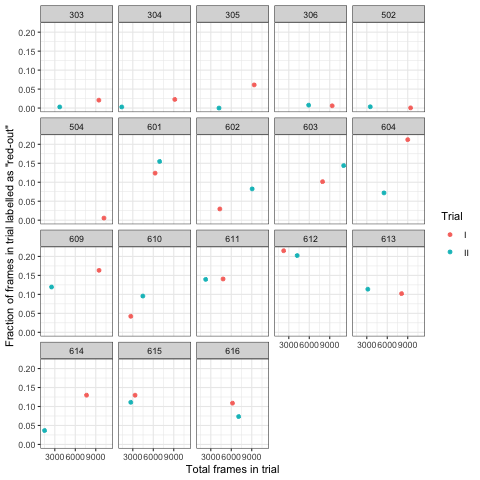

In [19]:
%%R -i outcomes_data_parkcity,plot_saving_dir


red_out_vs_trial_time <- ggplot(outcomes_data_parkcity %>% filter(total_red_out_frames >= 0), aes(est_EF-est_SF, fraction_red_out_frames, color=Trial)) +
    geom_point() +
    facet_wrap(~`Study.ID`) +
    xlab('Total frames in trial') + ylab('Fraction of frames in trial labelled as "red-out"') +
    theme_bw() 
#     theme(legend.position = c(1,0), legend.justification=c(1,0))

red_out_vs_trial_time

# ggsave(red_out_vs_trial_time, filename = paste0(plot_saving_dir, 'red_out_vs_trial_time.png'), width=6, height=6)

In [20]:
trial_1_values = []
trial_2_values = []

for ind, ro in outcomes_data_parkcity.iterrows():
    if ro['Trial'] == 'I':
        trial_1_values.append((ro['total_red_out_frames'], ro['fraction_red_out_frames']))
    elif ro['Trial'] == 'II':
        trial_2_values.append((ro['total_red_out_frames'], ro['fraction_red_out_frames']))
    else:
        continue

In [21]:
all_trials_relative = []
compared_trials = {}
# We want to skip over repeats (so 601I vs. 601II is the same as 601II vs. 601I)
for i, ri in outcomes_data_parkcity.iterrows():
    for j, rj in outcomes_data_parkcity.iterrows():  
        n1 = str(ri['Study ID']) + ri['Trial']
        n2 = str(rj['Study ID']) + rj['Trial']
        
        key1 = n1 + '-' + n2
        key2 = n2 + '-' + n1
        
        # To avoid repeats
        if key1 in compared_trials:
            continue
    
        all_trials_relative.append((
            str(ri['Study ID']) + ri['Trial'] + '-' + str(rj['Study ID']) + rj['Trial'],
            ri['total_red_out_frames']/rj['total_red_out_frames'],
            ri['fraction_red_out_frames']/rj['fraction_red_out_frames']
        ))
        compared_trials[key1] = True
        compared_trials[key2] = True

ZeroDivisionError: division by zero

In [ ]:
# len(all_trials_relative)

In [ ]:
proportional_values = [(trial_2_values[i][0]/trial_1_values[i][0], trial_2_values[i][1]/trial_1_values[i][1]) for i in range(len(trial_1_values))]

In [ ]:
prop_df = pd.DataFrame({
    'trials_compared': [i[0] for i in all_trials_relative],
    'frames': [i[1] for i in all_trials_relative],
    'ro': [i[2] for i in all_trials_relative]    
})

In [ ]:
prop_df

In [ ]:
%%R -i prop_df,plot_saving_dir

prop_df %<>% 
    mutate(
        t1_id = gsub('I+-.*', '', trials_compared),
        t2_id = gsub('I+$', '', gsub('.*-', '', trials_compared)),
        t1_num = gsub('[0-9]+', '', gsub('-.*', '', trials_compared)),
        t2_num = gsub('[0-9]+', '', gsub('.*-', '', trials_compared))
    )

prop_df_plot <- prop_df %>% 
    filter(!((t1_id == t2_id) & (t1_num == t2_num)))

ratios_all_trials <- ggplot(prop_df_plot, aes(log2(frames), log2(ro))) +
    geom_point() +
    xlab('log2(total frames proportion)') + ylab('log2(total red out proportion)') +
    ggtitle('Ratio of total frames and red out between trials') + 
    theme_bw()

ggsave(ratios_all_trials, filename = paste0(plot_saving_dir, 'ratios_all_trials.png'), width=6, height=6)

ratios_all_trials

# If we want to just compare trial II vs. trial I proportionally
for_plot <- prop_df %>%
    filter(t1_id == t2_id, t1_num != t2_num) %>%
    group_by(t1_id) %>%
    top_n(1, t1_num)

ratios_same_id <- ggplot(for_plot, aes((frames), (ro))) +
    geom_point() +
    geom_text_repel(aes(label=t1_id)) +
    xlab('log2(total frames proportion)') + ylab('log2(total red out proportion)') +
    ggtitle('Ratio of total frames and red out between trials (trial II/trial I)')

ggsave(ratios_same_id, filename = paste0(plot_saving_dir, 'ratios_same_id.png'), width=6, height=6)

ratios_same_id